# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **Tech Talent Recommendation Engine** |

# II. Notebook Target Definition

_Insert Text Here_

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
df = pd.read_pickle('../../data/processed/df.pkl')

In [3]:
df.head()

ResponseId                      MainBranch              Age  \
1           2  I am a developer by profession  25-34 years old   
2           3  I am a developer by profession  45-54 years old   
3           4  I am a developer by profession  25-34 years old   
4           5  I am a developer by profession  25-34 years old   
5           6  I am a developer by profession  35-44 years old   

                                          Employment  \
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   

                             RemoteWork  \
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   

                                             EdLevel YearsCode YearsCodePro  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18            9   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27           23   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6            4   
5  Some college/university study without earning ...        21           21   

                                DevType                   OrgSize  \
1  Senior Executive (C-Suite, VP, etc.)          2 to 9 employees   
2                   Developer, back-end  5,000 to 9,999 employees   
3                  Developer, front-end      100 to 499 employees   
4                 Developer, full-stack        20 to 99 employees   
5                   Developer, back-end      100 to 499 employees   

                                             Country  \
1                           United States of America   
2                           United States of America   
3                           United States of America   
4                                        Philippines   
5  United Kingdom of Great Britain and Northern I...   

                    Currency  CompTotal  \
1  USD\tUnited States dollar   285000.0   
2  USD\tUnited States dollar   250000.0   
3  USD\tUnited States dollar   156000.0   
4       PHP\tPhilippine peso  1320000.0   
5        GBP\tPound sterling    78000.0   

                              LanguageHaveWorkedWith  \
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   
5  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   

                              LanguageWantToWorkWith  \
1  Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...   
2                                 Haskell;OCaml;Rust   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   
4         HTML/CSS;JavaScript;Python;Rust;TypeScript   
5                                            Go;Rust   

                      DatabaseHaveWorkedWith  \
1                                   Supabase   
2                                        NaN   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5  BigQuery;Cloud Firestore;PostgreSQL;Redis   

                            DatabaseWantToWorkWith  \
1              Firebase Realtime Database;Supabase   
2                                              NaN   
3                                 PostgreSQL;Redis   
4  Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase   
5                                              NaN   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon We

# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [4]:
df.shape

(87973, 37)

## IV.B. Data Information Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87973 entries, 1 to 89183
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      87973 non-null  int64  
 1   MainBranch                      87973 non-null  object 
 2   Age                             87973 non-null  object 
 3   Employment                      87898 non-null  object 
 4   RemoteWork                      73810 non-null  object 
 5   EdLevel                         87973 non-null  object 
 6   YearsCode                       87435 non-null  object 
 7   YearsCodePro                    66136 non-null  object 
 8   DevType                         76872 non-null  object 
 9   OrgSize                         65043 non-null  object 
 10  Country                         87973 non-null  object 
 11  Currency                        65334 non-null  object 
 12  CompTotal                       48225

## IV.C. Missing Values Inspection

In [6]:
df_missing = pd.DataFrame(
    df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["variables", "missing_percentage"]
df_missing

variables  missing_percentage
0                       ResponseId            0.000000
1                       MainBranch            0.000000
2                              Age            0.000000
3                          EdLevel            0.000000
4                          Country            0.000000
5                       Employment            0.085253
6                        YearsCode            0.611551
7           LanguageHaveWorkedWith            0.946881
8                OpSysPersonal use            1.609585
9     NEWCollabToolsHaveWorkedWith            2.397326
10   OfficeStackSyncHaveWorkedWith            5.153854
11          LanguageWantToWorkWith            8.257079
12           OpSysProfessional use           10.669183
13         ToolsTechHaveWorkedWith           11.468291
14                         DevType           12.618644
15    NEWCollabToolsWantToWorkWith           12.872131
16                      RemoteWork           16.099258
17          DatabaseHaveWorkedWith           16.525525
18   OfficeStackSyncWantToWorkWith           20.684756
19  OfficeStackAsyncHaveWorkedWith           21.464540
20         ToolsTechWantToWorkWith           22.345492
21          WebframeHaveWorkedWith           23.910745
22                    YearsCodePro           24.822389
23                        Currency           25.734032
24                         OrgSize           26.064815
25          PlatformHaveWorkedWith           27.673263
26          DatabaseWantToWorkWith           30.761711
27          MiscTechHaveWorkedWith           35.185796
28          WebframeWantToWorkWith           35.501802
29          AISearchHaveWorkedWith           35.971264
30  OfficeStackAsyncWantToWorkWith           38.909665
31          PlatformWantToWorkWith           41.677560
32                       CompTotal           45.182044
33          MiscTechWantToWorkWith           46.747297
34          AISearchWantToWorkWith           47.540723
35             AIDevHaveWorkedWith           70.554602
36             AIDevWantToWorkWith           77.735214

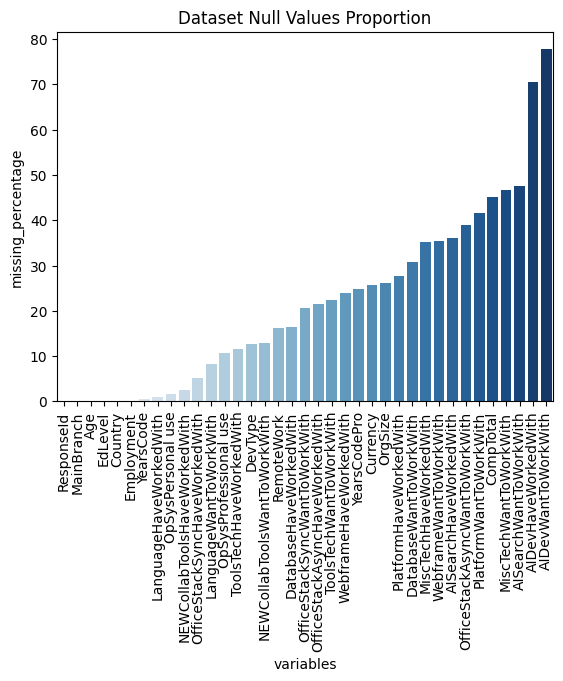

In [7]:
sns.barplot(data=df_missing,
            x="variables",
            y="missing_percentage",
            hue="variables",
            palette='Blues',
            legend=False)
plt.title("Dataset Null Values Proportion")
plt.xticks(rotation='vertical')
plt.show()

### IV.C.1. Missing Values Handling

In [8]:
def drop_irrelevant_and_missing_columns_above_threshold(df, cols_to_remove):
    df.drop(columns=cols_to_remove, inplace=True)
    return df


def drop_missing_rows_above_threshold(df, threshold):
    missing_per_row = df.isnull().sum(axis=1) / df.shape[1]
    df_filtered = df[missing_per_row <= threshold]
    return df_filtered

In [9]:
cols_to_remove = ["LanguageWantToWorkWith", "NEWCollabToolsWantToWorkWith", "OfficeStackSyncWantToWorkWith", "ToolsTechWantToWorkWith", "Currency", "DatabaseWantToWorkWith",
                  "WebframeWantToWorkWith", "AISearchHaveWorkedWith", "OfficeStackAsyncWantToWorkWith", "PlatformWantToWorkWith", "CompTotal", "MiscTechWantToWorkWith", "AISearchWantToWorkWith",
                  "AIDevHaveWorkedWith", "AIDevWantToWorkWith"]

In [10]:
df = drop_irrelevant_and_missing_columns_above_threshold(df, cols_to_remove)
df = drop_missing_rows_above_threshold(df, threshold=0.3)
df.shape

(80846, 22)

In [11]:
df.head()

ResponseId                      MainBranch              Age  \
1           2  I am a developer by profession  25-34 years old   
2           3  I am a developer by profession  45-54 years old   
3           4  I am a developer by profession  25-34 years old   
4           5  I am a developer by profession  25-34 years old   
5           6  I am a developer by profession  35-44 years old   

                                          Employment  \
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   

                             RemoteWork  \
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   

                                             EdLevel YearsCode YearsCodePro  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18            9   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27           23   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6            4   
5  Some college/university study without earning ...        21           21   

                                DevType                   OrgSize  \
1  Senior Executive (C-Suite, VP, etc.)          2 to 9 employees   
2                   Developer, back-end  5,000 to 9,999 employees   
3                  Developer, front-end      100 to 499 employees   
4                 Developer, full-stack        20 to 99 employees   
5                   Developer, back-end      100 to 499 employees   

                                             Country  \
1                           United States of America   
2                           United States of America   
3                           United States of America   
4                                        Philippines   
5  United Kingdom of Great Britain and Northern I...   

                              LanguageHaveWorkedWith  \
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   
5  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   

                      DatabaseHaveWorkedWith  \
1                                   Supabase   
2                                        NaN   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5  BigQuery;Cloud Firestore;PostgreSQL;Redis   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   
5  Amazon Web Services (AWS);Cloudflare;Google Cloud   

                         WebframeHaveWorkedWith       MiscTechHaveWorkedWith  \
1                    Next.js;React;Remix;Vue.js  Electron;React Native;Tauri   
2                                           NaN                          NaN   
3  Node.js;React;Ruby on Rails;Vue.js;WordPress                          NaN   
4   Express;Gatsby;NestJS;Next.js;Node.js;React                          NaN   
5                Angular;Express;NestJS;Node.js                          NaN   

                         ToolsTechHaveWorkedWith  \
1    Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2               Cargo;Docker;Kubernetes;Make;Nix   
3                 Homebrew;npm;Vite;Webpack;Yarn   
4                        Docker;npm;Webpack;Yarn   
5  Docker;Homebrew;Kubernetes;npm;pnpm;Terraform   

                    NEWCol

### IV.C.2. Missing Values Imputation for Categorical Columns

In [12]:
df.isnull().sum()

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                           23
RemoteWork                         8503
EdLevel                               0
YearsCode                           269
YearsCodePro                      15553
DevType                            5988
OrgSize                           16523
Country                               0
LanguageHaveWorkedWith              162
DatabaseHaveWorkedWith             9975
PlatformHaveWorkedWith            18603
WebframeHaveWorkedWith            16182
MiscTechHaveWorkedWith            26122
ToolsTechHaveWorkedWith            6800
NEWCollabToolsHaveWorkedWith        771
OpSysPersonal use                   586
OpSysProfessional use              6171
OfficeStackAsyncHaveWorkedWith    13286
OfficeStackSyncHaveWorkedWith      2155
dtype: int64

In [13]:
df = df.fillna(value="Null")

In [14]:
df.isnull().sum()

ResponseId                        0
MainBranch                        0
Age                               0
Employment                        0
RemoteWork                        0
EdLevel                           0
YearsCode                         0
YearsCodePro                      0
DevType                           0
OrgSize                           0
Country                           0
LanguageHaveWorkedWith            0
DatabaseHaveWorkedWith            0
PlatformHaveWorkedWith            0
WebframeHaveWorkedWith            0
MiscTechHaveWorkedWith            0
ToolsTechHaveWorkedWith           0
NEWCollabToolsHaveWorkedWith      0
OpSysPersonal use                 0
OpSysProfessional use             0
OfficeStackAsyncHaveWorkedWith    0
OfficeStackSyncHaveWorkedWith     0
dtype: int64

In [15]:
df.head()

ResponseId                      MainBranch              Age  \
1           2  I am a developer by profession  25-34 years old   
2           3  I am a developer by profession  45-54 years old   
3           4  I am a developer by profession  25-34 years old   
4           5  I am a developer by profession  25-34 years old   
5           6  I am a developer by profession  35-44 years old   

                                          Employment  \
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   

                             RemoteWork  \
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   

                                             EdLevel YearsCode YearsCodePro  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18            9   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27           23   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6            4   
5  Some college/university study without earning ...        21           21   

                                DevType                   OrgSize  \
1  Senior Executive (C-Suite, VP, etc.)          2 to 9 employees   
2                   Developer, back-end  5,000 to 9,999 employees   
3                  Developer, front-end      100 to 499 employees   
4                 Developer, full-stack        20 to 99 employees   
5                   Developer, back-end      100 to 499 employees   

                                             Country  \
1                           United States of America   
2                           United States of America   
3                           United States of America   
4                                        Philippines   
5  United Kingdom of Great Britain and Northern I...   

                              LanguageHaveWorkedWith  \
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   
5  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   

                      DatabaseHaveWorkedWith  \
1                                   Supabase   
2                                       Null   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5  BigQuery;Cloud Firestore;PostgreSQL;Redis   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   
5  Amazon Web Services (AWS);Cloudflare;Google Cloud   

                         WebframeHaveWorkedWith       MiscTechHaveWorkedWith  \
1                    Next.js;React;Remix;Vue.js  Electron;React Native;Tauri   
2                                          Null                         Null   
3  Node.js;React;Ruby on Rails;Vue.js;WordPress                         Null   
4   Express;Gatsby;NestJS;Next.js;Node.js;React                         Null   
5                Angular;Express;NestJS;Node.js                         Null   

                         ToolsTechHaveWorkedWith  \
1    Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2               Cargo;Docker;Kubernetes;Make;Nix   
3                 Homebrew;npm;Vite;Webpack;Yarn   
4                        Docker;npm;Webpack;Yarn   
5  Docker;Homebrew;Kubernetes;npm;pnpm;Terraform   

                    NEWCol

In [16]:
df.isnull().any()

ResponseId                        False
MainBranch                        False
Age                               False
Employment                        False
RemoteWork                        False
EdLevel                           False
YearsCode                         False
YearsCodePro                      False
DevType                           False
OrgSize                           False
Country                           False
LanguageHaveWorkedWith            False
DatabaseHaveWorkedWith            False
PlatformHaveWorkedWith            False
WebframeHaveWorkedWith            False
MiscTechHaveWorkedWith            False
ToolsTechHaveWorkedWith           False
NEWCollabToolsHaveWorkedWith      False
OpSysPersonal use                 False
OpSysProfessional use             False
OfficeStackAsyncHaveWorkedWith    False
OfficeStackSyncHaveWorkedWith     False
dtype: bool

## IV.D. Duplicated Values Inspection

In [17]:
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated.shape

(0, 22)

In [18]:
df_duplicated

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, EdLevel, YearsCode, YearsCodePro, DevType, OrgSize, Country, LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, MiscTechHaveWorkedWith, ToolsTechHaveWorkedWith, NEWCollabToolsHaveWorkedWith, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackSyncHaveWorkedWith]
Index: []

## IV.E. Data Visualization

### IV.E.1. Main Branch Distribution

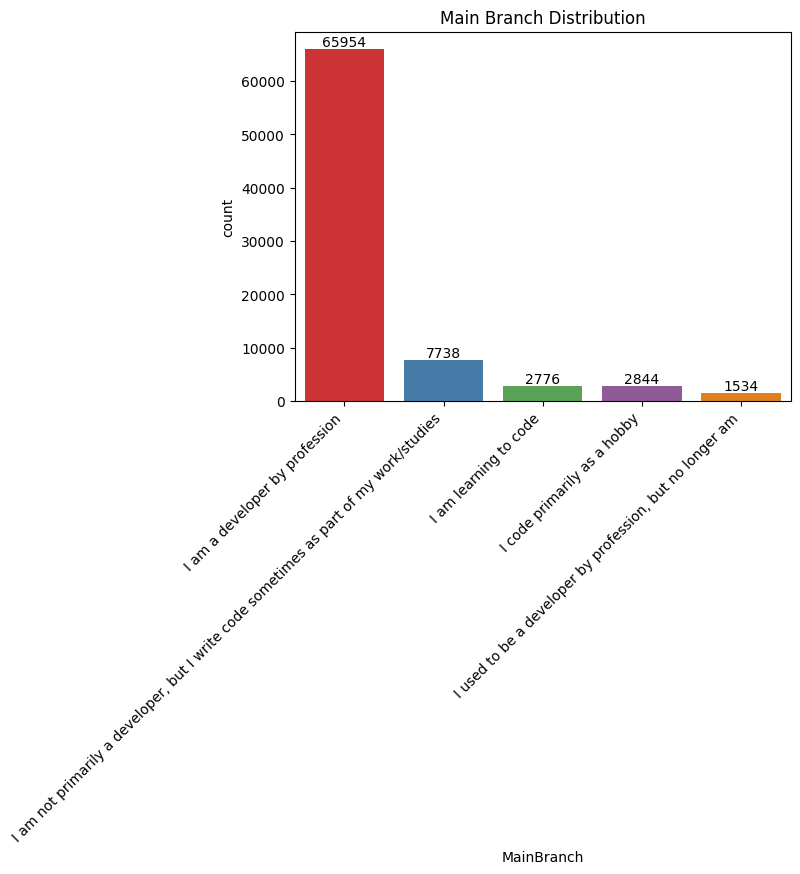

In [19]:
plt.title("Main Branch Distribution")
main_branch_distribution = sns.countplot(
    data=df, x="MainBranch", hue="MainBranch", palette='Set1', legend=False)
for container in main_branch_distribution.containers:
    main_branch_distribution.bar_label(container)
for item in main_branch_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.2. Age Distribution

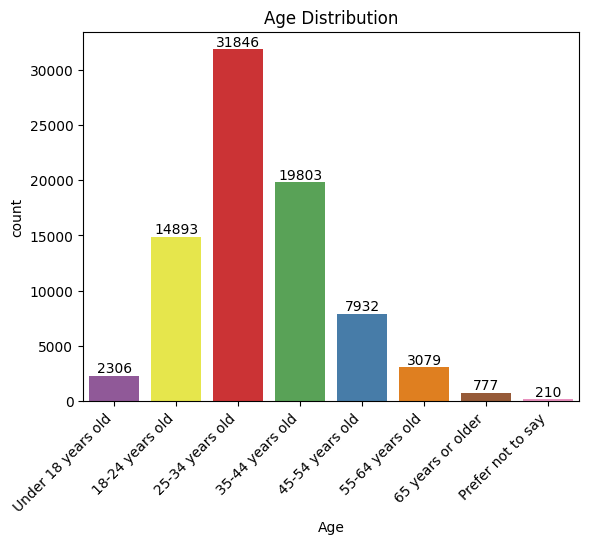

In [20]:
plt.title("Age Distribution")
custom_order = ["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old",
                "45-54 years old", "55-64 years old", "65 years or older", "Prefer not to say"]
age_distribution = sns.countplot(
    data=df, x="Age", hue="Age", palette='Set1', order=custom_order, legend=False)
for container in age_distribution.containers:
    age_distribution.bar_label(container)
for item in age_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.3. Employment Distribution

In [21]:
employment_counts = {
    "Employed, full-time": 0,
    "Employed, part-time": 0,
    "Independent contractor, freelancer, or self-employed": 0,
    "Not employed, but looking for work": 0,
    "Not employed, and not looking for work": 0,
    "Student, full-time": 0,
    "Student, part-time": 0,
    "Retired": 0,
    "I prefer not to say": 0,
    "Null": 0
}

for entry in df["Employment"]:
    for option in entry.split(";"):
        employment_counts[option.strip()] += 1

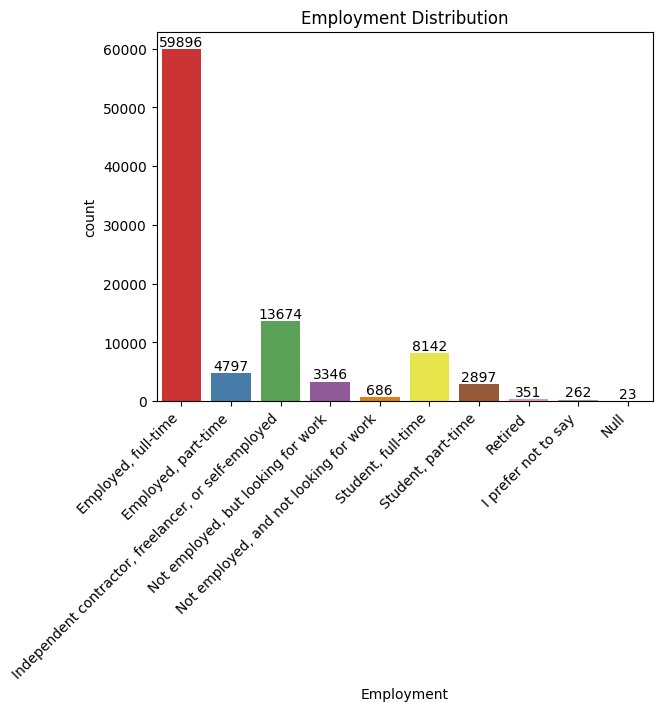

In [22]:
plt.title("Employment Distribution")
employment_distribution = sns.barplot(x=list(employment_counts.keys()), y=list(
    employment_counts.values()), hue=list(employment_counts.keys()), palette='Set1')
for container in employment_distribution.containers:
    employment_distribution.bar_label(container)
plt.ylabel("count")
plt.xlabel("Employment")
plt.xticks(rotation=45, ha='right')
plt.show()

### IV.E.4. Remote Work Preferences Distribution

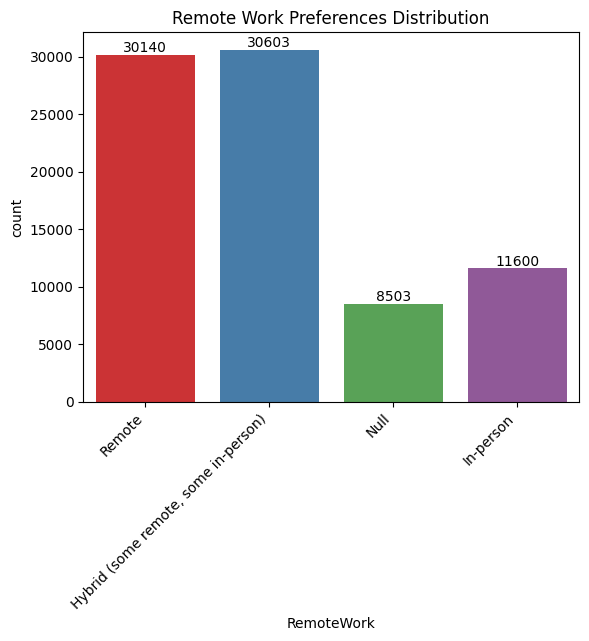

In [23]:
plt.title("Remote Work Preferences Distribution")
remote_work_distribution = sns.countplot(
    data=df, x="RemoteWork", hue="RemoteWork", palette='Set1', legend=False)
for container in remote_work_distribution.containers:
    remote_work_distribution.bar_label(container)
for item in remote_work_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.5. Education Level Distribution

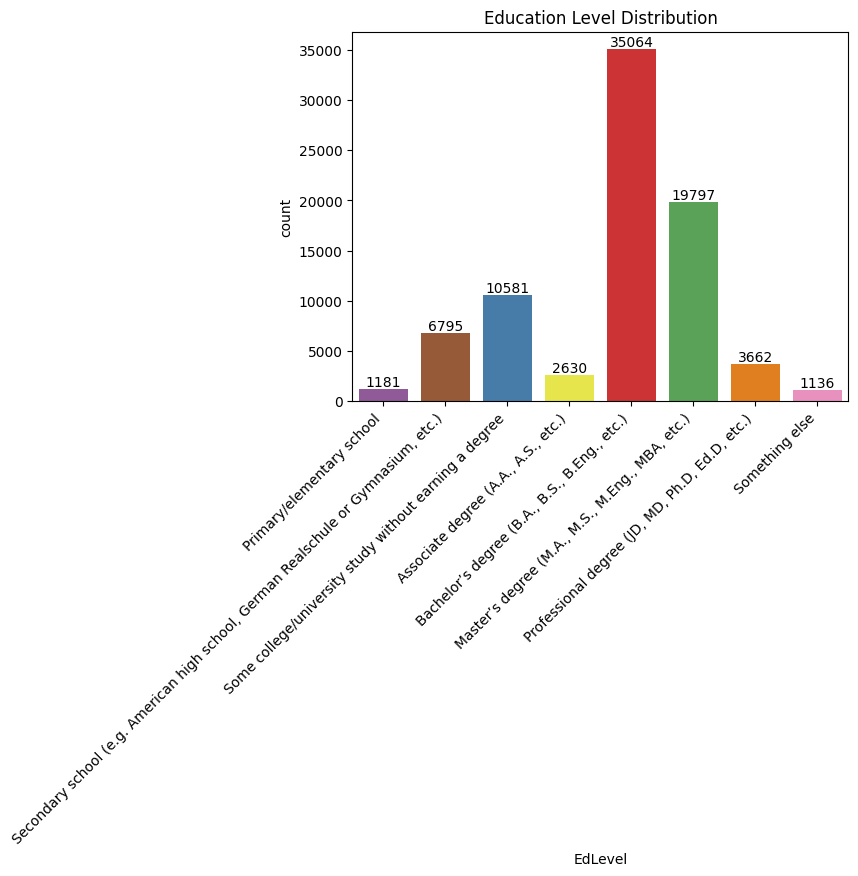

In [24]:
plt.title("Education Level Distribution")
custom_order = ["Primary/elementary school", "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "Some college/university study without earning a degree",
                "Associate degree (A.A., A.S., etc.)", "Bachelor’s degree (B.A., B.S., B.Eng., etc.)", "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
                "Professional degree (JD, MD, Ph.D, Ed.D, etc.)", "Something else"]
education_level_distribution = sns.countplot(
    data=df, x="EdLevel", hue="EdLevel", palette='Set1', order=custom_order, legend=False)
for container in education_level_distribution.containers:
    education_level_distribution.bar_label(container)
for item in education_level_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.6. Years Coding Distribution

In [25]:
df["YearsCode"].replace("More than 50 years", 51, inplace=True)
df["YearsCode"].replace("Less than 1 year", 0.5, inplace=True)
df["YearsCode"].replace("Null", 0, inplace=True)
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce')

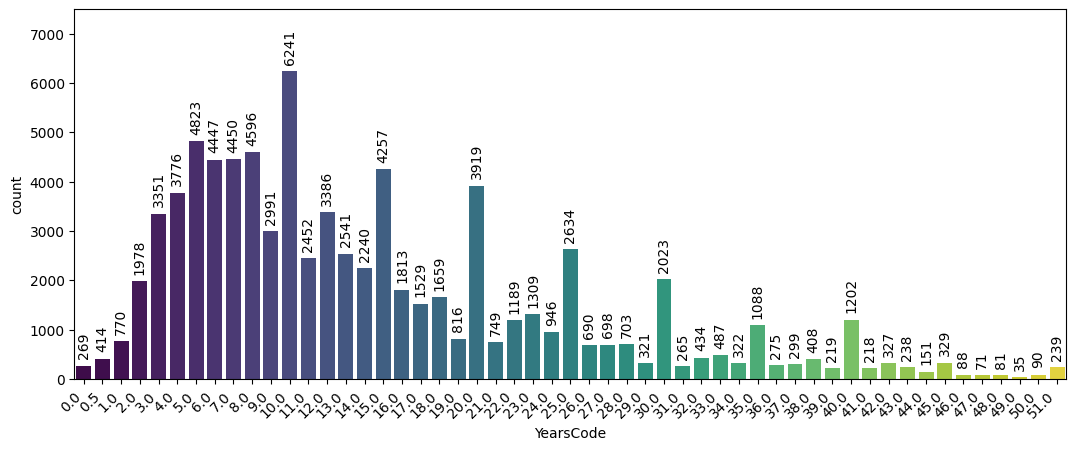

In [26]:
plt.figure(figsize=(12.8, 4.8))
years_code_distribution = sns.countplot(data=df, x="YearsCode", hue="YearsCode", palette='viridis', order=sorted(
    df["YearsCode"].unique()), legend=False)
max_label = max([bar.get_height() for bar in years_code_distribution.patches])
for bar in years_code_distribution.patches:
    height = bar.get_height()
    years_code_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
years_code_distribution.set_ylim(0, max_label * 1.2)
for item in years_code_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.7. Professional Years Coding Distribution

In [27]:
df["YearsCodePro"].replace("More than 50 years", 51, inplace=True)
df["YearsCodePro"].replace("Less than 1 year", 0.5, inplace=True)
df["YearsCodePro"].replace("Null", 0, inplace=True)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

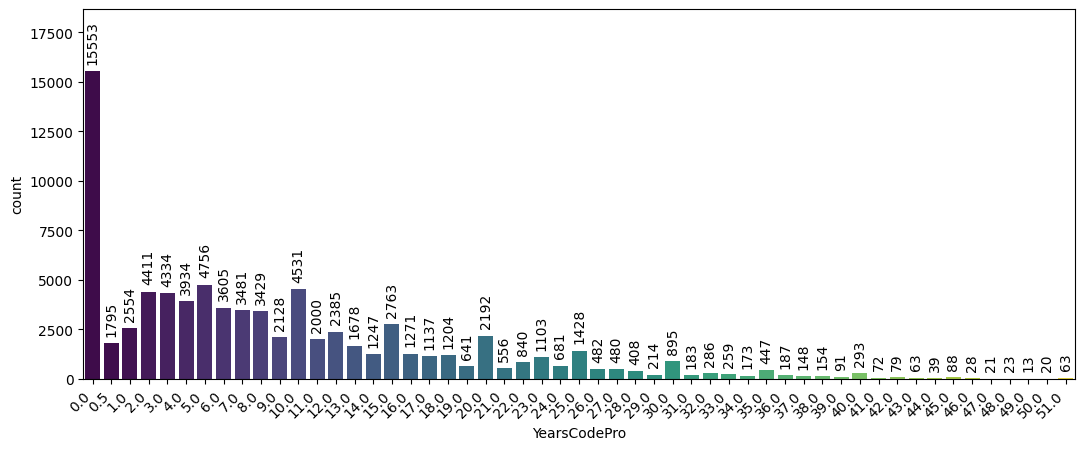

In [28]:
plt.figure(figsize=(12.8, 4.8))
years_code_distribution = sns.countplot(data=df, x="YearsCodePro", hue="YearsCodePro", palette='viridis', order=sorted(
    df["YearsCodePro"].unique()), legend=False)
max_label = max([bar.get_height() for bar in years_code_distribution.patches])
for bar in years_code_distribution.patches:
    height = bar.get_height()
    years_code_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
years_code_distribution.set_ylim(0, max_label * 1.2)
for item in years_code_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.8. Developer Type Distribution

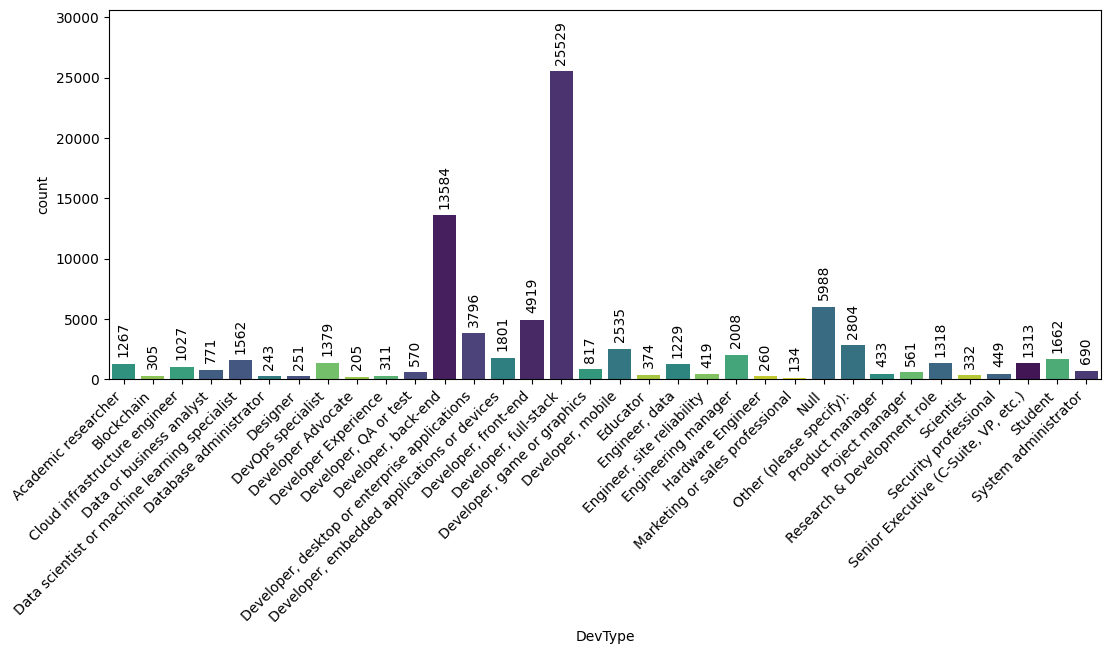

In [29]:
plt.figure(figsize=(12.8, 4.8))
dev_type_distribution = sns.countplot(data=df, x="DevType", hue="DevType", palette='viridis', order=sorted(
    df["DevType"].unique()), legend=False)
max_label = max([bar.get_height() for bar in dev_type_distribution.patches])
for bar in dev_type_distribution.patches:
    height = bar.get_height()
    dev_type_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
dev_type_distribution.set_ylim(0, max_label * 1.2)
for item in dev_type_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.9. Organization Size Distribution

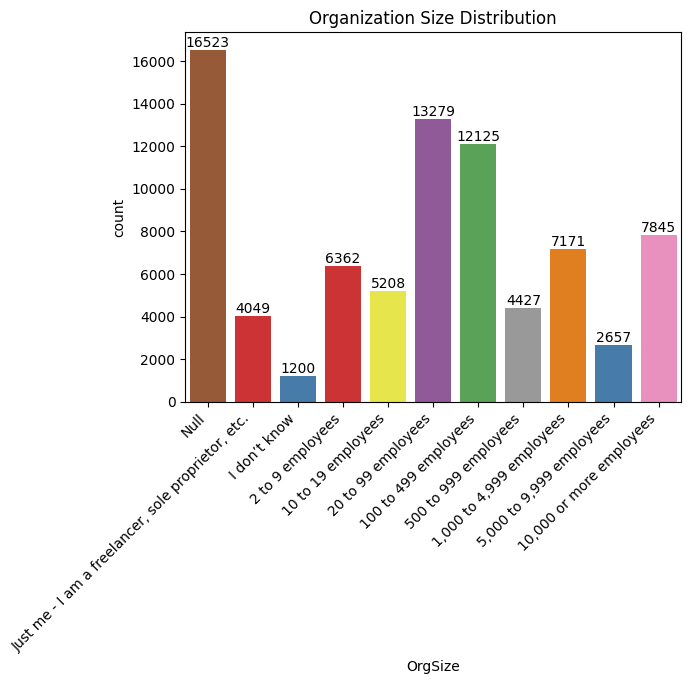

In [30]:
plt.title("Organization Size Distribution")
custom_order = ["Null", "Just me - I am a freelancer, sole proprietor, etc.", "I don’t know", "2 to 9 employees", "10 to 19 employees", "20 to 99 employees", "100 to 499 employees",
                "500 to 999 employees", "1,000 to 4,999 employees", "5,000 to 9,999 employees", "10,000 or more employees"]
org_size_distribution = sns.countplot(
    data=df, x="OrgSize", hue="OrgSize", palette='Set1', order=custom_order, legend=False)
for container in org_size_distribution.containers:
    org_size_distribution.bar_label(container)
for item in org_size_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.10. Country Distribution

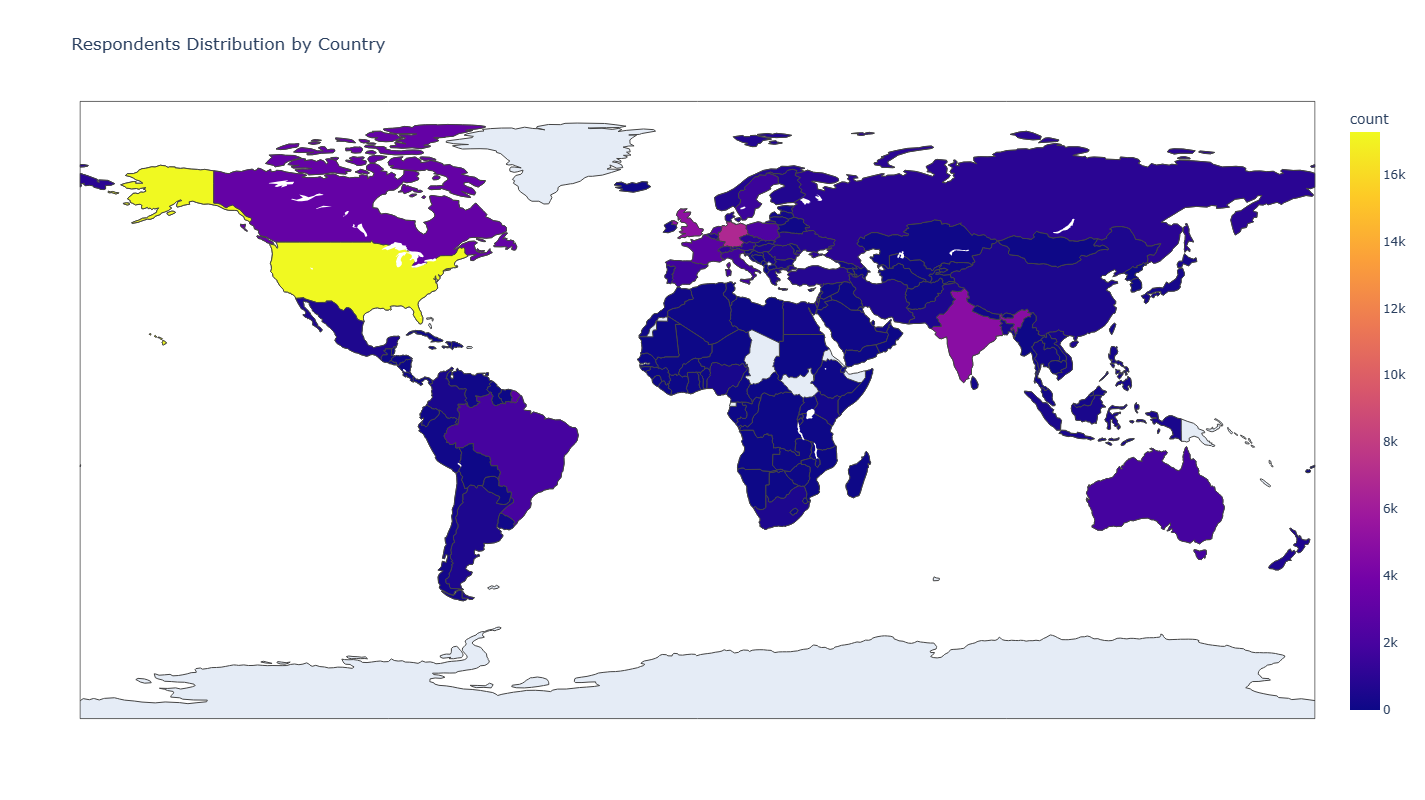

In [31]:
country_count = df["Country"].value_counts().reset_index()
country_count.columns = ["country", "count"]
fig = px.choropleth(country_count,
                    locations = "country",
                    locationmode = 'country names',
                    color = "count",
                    hover_name = "country",
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title = "Respondents Distribution by Country")
fig.update_layout(autosize = False, width = 1000, height = 800)
fig.show()

### IV.E.11. Programming Language Used Distribution

In [32]:
language_counts = {
    "Ada": 0,
    "Apex": 0,
    "APL": 0,
    "Assembly": 0,
    "Bash/Shell (all shells)": 0,
    "C": 0,
    "C#": 0,
    "C++": 0,
    "Clojure": 0,
    "Cobol": 0,
    "Crystal": 0,
    "Dart": 0,
    "Delphi": 0,
    "Elixir": 0,
    "Erlang": 0,
    "F#": 0,
    "Flow": 0,
    "Fortran": 0,
    "GDScript": 0,
    "Go": 0,
    "Groovy": 0,
    "Haskell": 0,
    "HTML/CSS": 0,
    "Java": 0,
    "JavaScript": 0,
    "Julia": 0,
    "Kotlin": 0,
    "Lisp": 0,
    "Lua": 0,
    "MATLAB": 0,
    "Nim": 0,
    "Objective-C": 0,
    "OCaml": 0,
    "Perl": 0,
    "PHP": 0,
    "PowerShell": 0,
    "Prolog": 0,
    "Python": 0,
    "R": 0,
    "Raku": 0,
    "Ruby": 0,
    "Rust": 0,
    "SAS": 0,
    "Scala": 0,
    "Solidity": 0,
    "SQL": 0,
    "Swift": 0,
    "TypeScript": 0,
    "VBA": 0,
    "Visual Basic (.Net)": 0,
    "Zig": 0,
    "Other (Please Specify):": 0,
    "Null":0
}

for entry in df["LanguageHaveWorkedWith"]:
    for option in entry.split(";"):
        language_counts[option.strip()] += 1

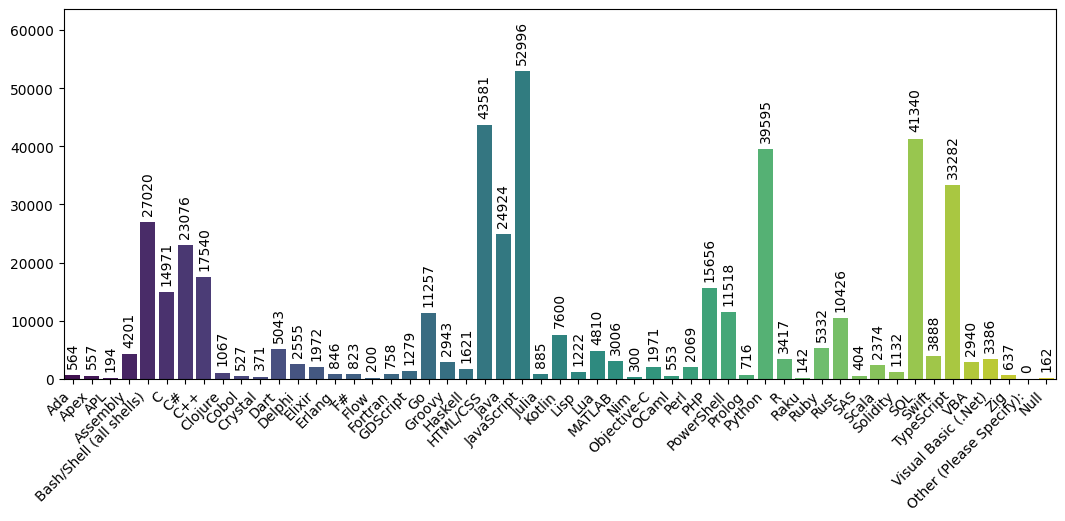

In [33]:
plt.figure(figsize=(12.8, 4.8))
languages = list(language_counts.keys())
counts = list(language_counts.values())
language_distribution = sns.barplot(
    x=languages, y=counts, hue=languages, palette='viridis')
max_label = max(counts)
for bar in language_distribution.patches:
    height = bar.get_height()
    language_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
language_distribution.set_ylim(0, max_label * 1.2)
for item in language_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.12. Database Used Distribution

In [34]:
database_counts = {
    "BigQuery": 0,
    "Cassandra": 0,
    "Clickhouse": 0,
    "Cloud Firestore": 0,
    "Cockroachdb": 0,
    "Cosmos DB": 0,
    "Couch DB": 0,
    "Couchbase": 0,
    "Datomic": 0,
    "DuckDB": 0,
    "Dynamodb": 0,
    "Elasticsearch": 0,
    "Firebase Realtime Database": 0,
    "Firebird": 0,
    "H2": 0,
    "IBM DB2": 0,
    "InfluxDB": 0,
    "MariaDB": 0,
    "Microsoft Access": 0,
    "Microsoft SQL Server": 0,
    "MongoDB": 0,
    "MySQL": 0,
    "Neo4J": 0,
    "Oracle": 0,
    "PostgreSQL": 0,
    "RavenDB": 0,
    "Redis": 0,
    "Snowflake": 0,
    "Solr": 0,
    "SQLite": 0,
    "Supabase": 0,
    "TiDB": 0,
    "Other (Please Specify):": 0,
    "Null": 0
}

for entry in df["DatabaseHaveWorkedWith"]:
    for option in entry.split(";"):
        database_counts[option.strip()] += 1

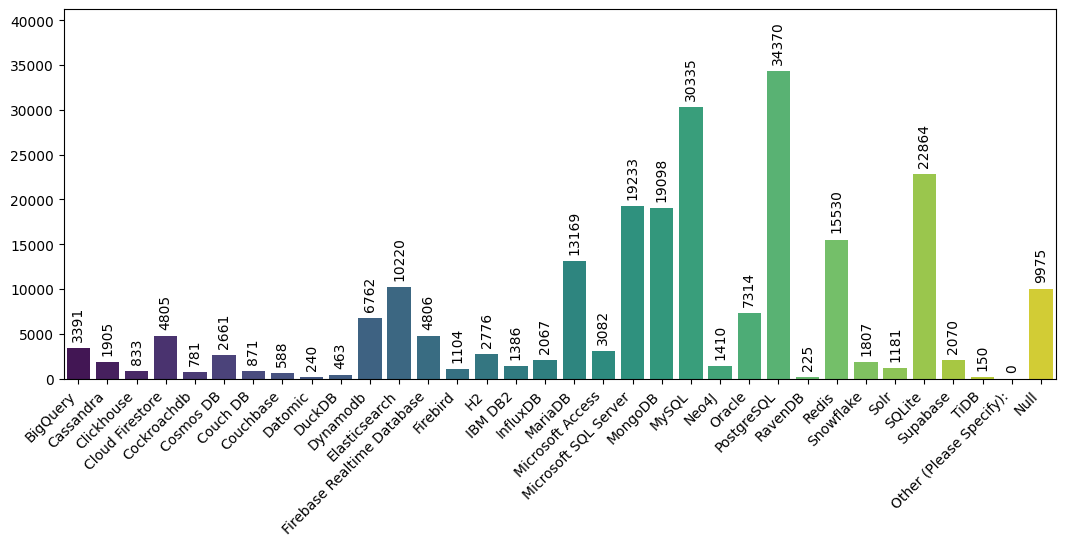

In [35]:
plt.figure(figsize=(12.8, 4.8))
databases = list(database_counts.keys())
counts = list(database_counts.values())
database_distribution = sns.barplot(
    x=databases, y=counts, hue=databases, palette='viridis')
max_label = max(counts)
for bar in database_distribution.patches:
    height = bar.get_height()
    database_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
database_distribution.set_ylim(0, max_label * 1.2)
for item in database_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.13. Cloud Platform Used Distribution

In [ ]:
platform_counts = {
    "Amazon Web Services (AWS)": 0,
    "Cloudflare": 0,
    "Colocation": 0,
    "Digital Ocean": 0,
    "Firebase": 0,
    "Fly.io": 0,
    "Google Cloud": 0,
    "Heroku": 0,
    "Hetzner": 0,
    "IBM Cloud Or Watson": 0,
    "Linode": 0,
    "Managed Hosting": 0,
    "Microsoft Azure": 0,
    "Netlify": 0,
    "OpenShift": 0,
    "OpenStack": 0,
    "Oracle Cloud Infrastructure (OCI)": 0,
    "OVH": 0,
    "Render": 0,
    "Scaleway": 0,
    "Vercel": 0,
    "VMware": 0,
    "Vultr": 0,
    "Other (Please Specify):": 0,
    "Null": 0
}

for entry in df["PlatformHaveWorkedWith"]:
    for option in entry.split(";"):
        platform = option.strip()
        if language in platform_counts:
            platform_counts[platform] += 1
        else:
            platform_counts["Other (Please Specify):"] += 1

In [ ]:
plt.figure(figsize=(12.8, 4.8))
platforms = list(platform_counts.keys())
counts = list(platform_counts.values())
platform_distribution = sns.barplot(x=platforms, y=counts, hue=platforms, palette='viridis')
max_label = max(counts)
for bar in platform_distribution.patches:
    height = bar.get_height()
    platform_distribution.annotate('{:.0f}'.format(height), 
                                  (bar.get_x() + bar.get_width() / 2, height), 
                                  ha='center', va='bottom', 
                                  xytext=(0, 5), textcoords='offset points', rotation=90)
platform_distribution.set_ylim(0, max_label * 1.2)
for item in platform_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.14. Webframework Used Distribution

### IV.E.15. Other Framework Used Distribution

### IV.E.16. Developer Tools Used Distribution

### IV.E.17. Development Environment Used Distribution

### IV.E.18. Operating System for Personal Usage Distribution

### IV.E.19. Operating System for Professional Usage Distribution

### IV.E.20. Collaborative Work Management Tools Used Distribution

### IV.E.21. Communication Tools Used Distribution

## IV.F. Statistical Analysis

### IV.F.1. Statistical Description

In [ ]:
X.describe()

### IV.F.2. Skewness Analysis

In [ ]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_skewness = X[numeric_columns].skew()
X_skewness = pd.DataFrame(
    {"variables": X_skewness.index, "skewness": X_skewness.values})

In [ ]:
plt.title("Skewness Analysis")
skewness_plot = sns.barplot(x="variables", y="skewness", data=X_skewness)
skewness_plot.bar_label(skewness_plot.containers[0])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Variables")
plt.ylabel("Skewness")
plt.show()

### IV.F.3. Chi-Squared Analysis

Analyze the independence or dependence between categorical variables and assess the goodness of fit of observed data to an expected distribution.

In [ ]:
X_categorical = X.select_dtypes(include='object').copy()
X_numerical = X.select_dtypes(include='number').copy()
X_categorical.shape, X_numerical.shape

In [ ]:
X_categorical.columns

In [ ]:
X_numerical.columns

In [ ]:
chi2_list = []

for column in X_categorical.columns:
    cross_tab = pd.crosstab(y, X_categorical[column])
    chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(
        cross_tab)
    chi2_list.append({"variables": column, "p-value": round(p_value, 10)})

chi2_result = pd.DataFrame(chi2_list)
chi2_result = chi2_result.sort_values(by="p-value", ascending=True)
chi2_result.reset_index(drop=True, inplace=True)
chi2_result

### IV.F.4. T-Statistics Analysis

Assess if there is a significant difference in means between two groups, such as comparing the mean scores of a continuous variable between two treatment groups.

In [ ]:
X_numerical.fillna(X_numerical.mean(), inplace=True)

In [ ]:
t_test_results = pd.DataFrame()

for variable in X_numerical.columns:
    group_0_values = X_numerical.loc[y == 0, variable]
    group_1_values = X_numerical.loc[y == 1, variable]
    t_statistic, p_value = ttest_ind(group_0_values, group_1_values)
    result_df = pd.DataFrame(
        {"variables": [variable], "t-statistic": [t_statistic], "p-value": [p_value]})
    t_test_results = pd.concat([t_test_results, result_df], ignore_index=True)

t_test_table = t_test_results.sort_values(by="t-statistic", ascending=False)
t_test_table.reset_index(drop=True, inplace=True)
t_test_table

### IV.F.5. ANOVA F Analysis

Compare more than two groups, such as comparing the mean scores of a continuous variable among different experimental conditions.

In [ ]:
X_numerical.fillna(X_numerical.mean(), inplace=True)

In [ ]:
f_statistic, p_values = f_classif(X_numerical, y)

anova_f_table = pd.DataFrame({"variables": X_numerical.columns,
                             "f-score": f_statistic, "p-value": p_values.round(decimals=10)})
anova_f_table.sort_values(by="f-score", ascending=False,
                          inplace=True, ignore_index=True)
anova_f_table

## IV.G. Correlation Analysis

In [ ]:
X_numerical.corr()

In [ ]:
sns.heatmap(data=X_numerical.corr())

In [ ]:
corr_matrix = X_numerical.corr()
high_corr_list = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname1, colname2 = corr_matrix.columns[i], corr_matrix.columns[j]
            high_corr_list.append([colname1, colname2, corr_matrix.iloc[i, j]])

high_corr_df = pd.DataFrame(high_corr_list, columns=["column_1", "column_2", "correlation_value"])
high_corr_df

# V. Preprocessing

## V.A. Columns Reorder

In [ ]:
custom_order = ["column_0", "column_1", "column_2"]

In [ ]:
X = X.reindex(columns=custom_order)
X.shape

In [ ]:
X.head()

## V.B. Specific Preprocessing

## V.C. Export Data

In [ ]:
df_train.to_pickle('../../data/processed/df_train.pkl')
df_test.to_pickle('../../data/processed/df_test.pkl')